# IMPORT PACKAGES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import umap.umap_ as umap
import seaborn as sns
import os
import hdbscan
%matplotlib inline

from sentence_transformers import SentenceTransformer
from fuzzywuzzy import process, fuzz

C:\Users\t-sadash\Anaconda3\envs\muse\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# READ DATA

In [2]:
df = pd.read_json("./data/article370_misinformation_tweets.json")

In [3]:
df.head()

,screen_name,party,created_at,id_str,full_text,hashtags,retweet_count,retweet_handle
2229,ARDMEHRA1966,BJP,2019-08-06 06:31:25,1158626614453760000,article35a jammuandkashmir ladakh kashmirhamar...,"[Article35A, JammuAndKashmir, Ladakh, KashmirH...",18,Ramesh_BJP
2591,ashutoshm2848,BJP,2019-08-05 06:51:17,1158269223417733120,syama p mukherjee knew that a day will come wh...,"[Article370, KashmirParFinalFight]",0,None
2595,ashutoshm2848,BJP,2019-08-05 13:59:15,1158376928354508800,keep calm and trust mota bhai kashmirparfinalf...,"[KashmirParFinalFight, AmitShah, ScrapArticle3...",0,None
2600,ashutoshm2848,BJP,2019-08-11 07:11:16,1160448580978479104,sunday morning dispatch from kashmir birds fly...,[Kashmir],540,AdityaRajKaul
2807,Avinash03810101,BJP,2019-11-19 07:01:58,1196685028580679680,kashmirwelcomeschange best pic from jampk,[KashmirWelcomesChange],110,GogiRajliwal


In [4]:
df.shape[0]

503

In [5]:
df = df.drop_duplicates(subset='full_text')

In [6]:
df.shape

(382, 8)

In [7]:
def fuzzy_matching(x, matches):
    match = process.extractBests(x, df['full_text'].tolist(), scorer=fuzz.token_sort_ratio,
               score_cutoff = 80)
    print(len(match))
    matches.append(match)

In [8]:
matches = []
df['full_text'].apply(lambda x: fuzzy_matching(x,matches))

1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


2229      None
2591      None
2595      None
2600      None
2807      None
          ... 
526808    None
527814    None
527821    None
527892    None
528347    None
Name: full_text, Length: 382, dtype: object

In [42]:
import pickle

with open ('article370_fuzzy_matches', 'wb') as f:
    pickle.dump(matches,f)

In [9]:
for match in matches:
    if len(match) > 1:
        print(match)
        for i in range(1,len(match)):
            df.drop(df[df['full_text'] == match[i][0]].index, inplace = True)
        print("Deleted {} Rows".format(len(match)-1))

[('congratulation to all indians 370 and 35a in dustbin its rightful place thank you bjp welldone modiji and amit shah kashmirparfinalfight article370  one flag one nation hdmalhotra manojtiwarimp jitenderkanwar parveshadv ', 100), ('congratulation to all indians 370 and 35a in dustbin its rightful place thank you bjp welldone modiji and amit shah kashmirparfinalfight article370 ', 81)]
Deleted 1 Rows
[('now india has 28 states 8 union territories  article370 kashmirbleeds kashmirhamarahai kashmirparfinalfight kashmirparfinalfight', 100), ('now india has 28 states 8 union territories  article370 kashmirbleeds kashmirhamarahai kashmirparfinalfight ', 91)]
Deleted 1 Rows
[('3 back to back six boom article370 kashmirparfinalfight ', 100), ('3 back to back six boom article370 kashmirparfinalfight  kashmirhamarahai ', 87)]
Deleted 1 Rows
[('historic moment for india home minister amit shah announces scrapping of article 370 in jammu n kashmir jai hind  remove35a kashmirparfinalfight article

In [10]:
df.shape

(363, 8)

# DOWNLOAD MUSE

In [11]:
muse = SentenceTransformer('distiluse-base-multilingual-cased-v2')

In [12]:
def embed(sentences):
    return muse.encode(sentences)

# TWEET EMBEDDINGS

In [13]:
screen_names = []
party = []
embeddings = []
no_users = len(df['screen_name'].unique())
tweets = []
def get_user_embeddings(df):
    for i, (sc, grp) in enumerate(df.groupby('screen_name')):
        screen_names.extend(grp['screen_name'].tolist())
        embeddings.extend(embed(grp['full_text'].tolist()))
        party.extend(grp['party'].tolist())
        tweets.extend(grp['full_text'].tolist())
        print("{0}/{1}".format(i,no_users), end = '\r', flush = True)

In [14]:
get_user_embeddings(df)

In [15]:
print(len(screen_names), len(party), len(embeddings), embeddings[0].shape)

363 363 363 (512,)


# UMAP REDUCTION

In [16]:
tweet_embeddings = np.array(embeddings)

In [17]:
reducer = umap.UMAP()

In [18]:
umap_tweet_embedding = reducer.fit_transform(tweet_embeddings)
umap_tweet_embedding.shape

(363, 2)

# CLUSTER EMBEDDINGS

# HDB-SCAN

In [31]:
clusterer = hdbscan.HDBSCAN(min_cluster_size = 6)

In [32]:
clusterer.fit(umap_tweet_embedding)

HDBSCAN(min_cluster_size=6)

In [33]:
clusterer.labels_.max()

6

In [34]:
scatter_df = pd.DataFrame()
scatter_df['x'] = umap_tweet_embedding[:, 0]
scatter_df['y'] = umap_tweet_embedding[:, 1]
scatter_df['party'] = party
scatter_df['screen_name'] = screen_names
scatter_df['tweets'] = tweets

In [35]:
scatter_df

,x,y,party,screen_name,tweets
0,6.828958,11.718719,INF,1Hemanttiwari,kashmir ruckus in parliament after amitshah an...
1,10.465922,9.580171,INF,1Hemanttiwari,"#kashmiroperation धारा 370हटाने, राज्य के पुनर..."
2,10.099915,9.614755,INF,1Hemanttiwari,#kashmiroperation \nऐतिहासिक फैसला!\n#जम्मूकश...
3,9.506536,10.367865,BJP,56perumal,why not name the srinagar stadium after adi sh...
4,6.360335,12.027316,BJP,AB_BJP,bill to annul article370 amp article35a passed...
...,...,...,...,...,...
358,10.062700,11.315251,INF,vivekbhavsar,over 6000 youth take part in army recruitment ...
359,6.721293,11.994666,INF,viveksinha28,excerpts of columns on art 370 amp art 35a wri...
360,6.561605,10.628782,INF,wajihulla,jubilant voices of kashmiripandits as home min...
361,7.953005,12.654979,INF,whoskj2,three dead in todays fake encounters insaaniya...


In [36]:
scatter_df['cluster_labels'] = clusterer.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

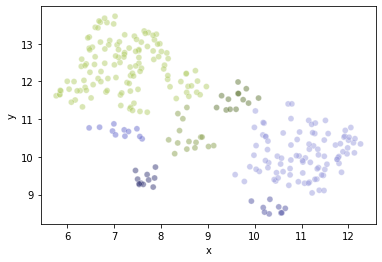

In [37]:
sns.scatterplot(x="x", y = "y", data = scatter_df[(scatter_df['cluster_labels']!=-1)], hue = 'cluster_labels', palette = 'tab20b',legend = False, alpha = 0.5)

## TOP TWEETS

In [38]:
scatter_df['prob'] = clusterer.probabilities_

In [39]:
df_clusters = []
for idx, grp in scatter_df[(scatter_df['cluster_labels']!=-1)].groupby('cluster_labels'):
    sorted_grp = grp.sort_values(by='prob',ascending = False)
    print('Top Tweets for Cluster {} with probabilities {}'.format(idx,sorted_grp['prob'].tolist()[:10]))
    print(sorted_grp['tweets'].tolist()[:10])
    print('-----------------------------------------------------------------')
    
    n = sorted_grp.shape[0]
    df_t = pd.DataFrame()
    df_t['cluster_id'] = [idx]*n
    df_t['tweet'] = sorted_grp['tweets'].tolist()
    df_t['probability'] = sorted_grp['prob'].tolist()
    df_t['screen_name'] = sorted_grp['screen_name'].tolist()
    df_clusters.append(df_t)

Top Tweets for Cluster 0 with probabilities [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9867328943011607, 0.9669311447883407, 0.9535960004129368, 0.7833186648871924]
['retweet if you support one country one constitution one flag shameoncongress article370 kashmirmeintiranga ', 'one nation one flag one constitution proud of hon shr pm narendramodi ji and shri amitshah ji for taking this step kashmirmeintiranga onenationonelaw onenationoneteam oneindia article370 bharatekhai 370abolished historic bjp ', 'one nation one flag one emotion love india historic decision remove35a article370 jammuandkashmir kashmirhamarahai ladakh kashmirparfinalfight 370gaya 370gone 370abolished ladakh ', 'national flag hoisted in lalchowk in srinagar to giant screen telecast of pm narendramodi independenceday speech at jehangirchowk which isnt far from lalchowk a stark contrast to independenceday celebrations in jammuandkashmir on the first year of abrogation article370 ', 'one flag one nation one constitution long live

In [41]:
pd.concat(df_clusters, ignore_index = True).to_excel("./data/article370_clusters_tweets.xlsx", index = None)